In [166]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


In [124]:
df = pd.read_csv("./Taller5_2_Modificada.csv")
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,736216184,09/30/2016,23:25:00,09/30/2016,23:25:00,09/30/2016,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,42,NaN,TRANSIT - NYC SUBWAY,NaN,NaN,1015308.0,244373.0,40.837376,-73.887761,"(40.837376359, -73.887760929)"
1,294332956,09/30/2016,23:16:00,09/30/2016,23:21:00,09/30/2016,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,71,OPPOSITE OF,STREET,NaN,NaN,997932.0,180172.0,40.661205,-73.950687,"(40.661204871, -73.950686652)"
2,852981427,09/30/2016,23:00:00,09/30/2016,23:05:00,09/30/2016,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",...,43,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,CASTLE HILL,1025580.0,236918.0,40.816872,-73.850685,"(40.816872438, -73.850684927)"
3,369976063,09/30/2016,23:00:00,NaN,NaN,09/30/2016,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,...,103,NaN,STREET,NaN,NaN,1038464.0,192970.0,40.696177,-73.804492,"(40.696177006, -73.804492266)"
4,117213771,09/30/2016,23:00:00,09/30/2016,23:10:00,09/30/2016,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",...,110,FRONT OF,STREET,NaN,NaN,1016301.0,209428.0,40.741458,-73.884339,"(40.741458245, -73.884339073)"


Se eligió la variable LAW_CAT_CD con la idea de predecir que tan grave es una ofensa en base a sus otros datos.

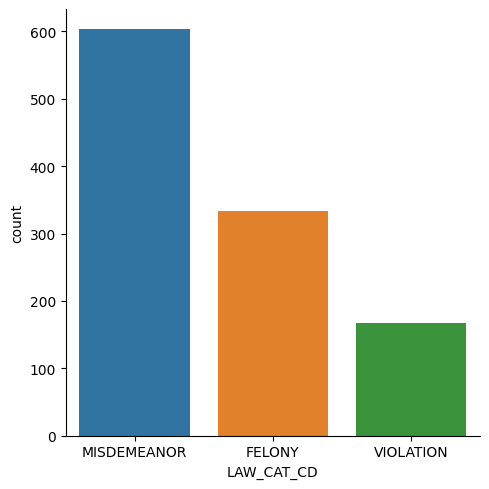

In [162]:
sns.catplot(df, x = "LAW_CAT_CD", kind = "count")

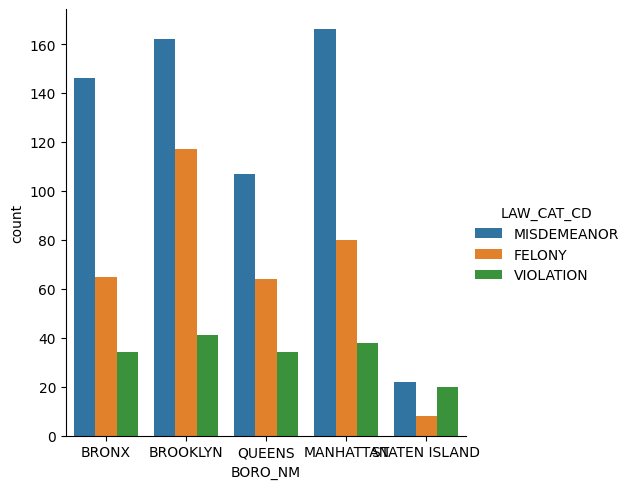

In [187]:
sns.catplot(df, x = "BORO_NM", hue = "LAW_CAT_CD", kind = "count")
plt.show()

In [125]:
df.isnull().sum()

CMPLNT_NUM              0
CMPLNT_FR_DT            0
CMPLNT_FR_TM            0
CMPLNT_TO_DT          203
CMPLNT_TO_TM          201
RPT_DT                  0
KY_CD                   0
OFNS_DESC               0
PD_CD                   1
PD_DESC                 1
CRM_ATPT_CPTD_CD        0
LAW_CAT_CD              0
JURIS_DESC              0
BORO_NM                 0
ADDR_PCT_CD             0
LOC_OF_OCCUR_DESC     244
PREM_TYP_DESC           5
PARKS_NM             1096
HADEVELOPT           1046
X_COORD_CD             19
Y_COORD_CD             19
Latitude               19
Longitude              19
Lat_Lon                19
dtype: int64

Elección de columnas y eliminación de nulos

In [126]:
df_selected = df[["CMPLNT_FR_DT", "CMPLNT_FR_TM", "KY_CD", "PD_CD", "LAW_CAT_CD","JURIS_DESC", "BORO_NM", "ADDR_PCT_CD"]].copy()

df_selected.dropna(inplace=True)

X = df_selected.drop("LAW_CAT_CD", axis=1)
y = df_selected["LAW_CAT_CD"]

In [127]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [128]:
X.dtypes

CMPLNT_FR_DT     object
CMPLNT_FR_TM     object
KY_CD             int64
PD_CD           float64
JURIS_DESC       object
BORO_NM          object
ADDR_PCT_CD       int64
dtype: object

In [129]:
for col in X.columns:
    X[col] = X[col].astype("category")

In [130]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, X.columns)
    ])

In [132]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier())
])

Para la elección de estos parámetros decidí usar GridSearCV que ayuda a buscar la mejor métrica en base a los parámetros que se le indique, incluso usando Cross validation (cv)

In [ ]:
params = {
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_depth": range(1, 10)
}

model = GridSearchCV(pipeline, params, scoring="accuracy", cv=5)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'KY_CD', 'PD_CD', 'JURIS_DESC',
       'BORO_NM', 'ADDR_PCT_CD'],
      dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': range(1, 10)},
             scoring='accuracy')

In [176]:
results = model.cv_results_

for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Exactitud promedia: {mean_score:.4f} - Parámetros: {params}")

Exactitud promedia: 0.6984 - Parámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 1}
Exactitud promedia: 0.7846 - Parámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 2}
Exactitud promedia: 0.8299 - Parámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 3}
Exactitud promedia: 0.8549 - Parámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 4}
Exactitud promedia: 0.8730 - Parámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 5}
Exactitud promedia: 0.8968 - Parámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 6}
Exactitud promedia: 0.9365 - Parámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 7}
Exactitud promedia: 0.9422 - Parámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 8}
Exactitud promedia: 0.9524 - Parámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 9}
Exactitud promedia: 0.6984 - Parámetros: {'classifier__criterion': 'entro

Al parecer el modelo encontró que para esta métrica el mejor criterio era gini, con una máxima profundidad de 9

In [134]:
model.best_params_

{'classifier__criterion': 'gini', 'classifier__max_depth': 9}

In [135]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9592760180995475